# Predicting First-Year GPA: Insights from SAT Scores and High School Performance

This project aims to analyze a dataset of 1,000 college students to explore the relationship between SAT scores (verbal, math, and total) and their first-year GPA. The analysis will include descriptive statistics, correlation studies, and predictive modeling to assess how well SAT scores and high school GPA can predict first-year academic performance. Ultimately, this analysis seeks to provide insights that may assist students in understanding the factors contributing to their college success.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

sns.set() #This will allow seaborn to manipulate all the matplotlib styles 

## Load Dataset

In [2]:
data = pd.read_csv("sat-gpa.csv")
data.head()

,sex,sat_v,sat_m,sat_sum,hs_gpa,fyc_gpa
0,1,65,62,127,3.40,3.18
1,0,58,64,122,4.00,3.33
2,0,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63


## Explore Data

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      1000 non-null   int64  
 1   sat_v    1000 non-null   int64  
 2   sat_m    1000 non-null   int64  
 3   sat_sum  1000 non-null   int64  
 4   hs_gpa   1000 non-null   float64
 5   fyc_gpa  1000 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


,sex,sat_v,sat_m,sat_sum,hs_gpa,fyc_gpa
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.516000,48.93400,54.395000,103.329000,3.198100,2.467950
std,0.499994,8.23392,8.450111,14.287368,0.541647,0.740805
min,0.000000,24.00000,29.000000,53.000000,1.800000,0.000000
25%,0.000000,43.00000,49.000000,93.000000,2.800000,1.980000
50%,1.000000,49.00000,55.000000,103.000000,3.200000,2.465000
75%,1.000000,54.00000,60.000000,113.000000,3.700000,3.020000
max,1.000000,76.00000,77.000000,144.000000,4.500000,4.000000


## Data Cleaning

In [4]:
data.isnull().sum()

sex        0
sat_v      0
sat_m      0
sat_sum    0
hs_gpa     0
fyc_gpa    0
dtype: int64

## Exploratory Data Analysis

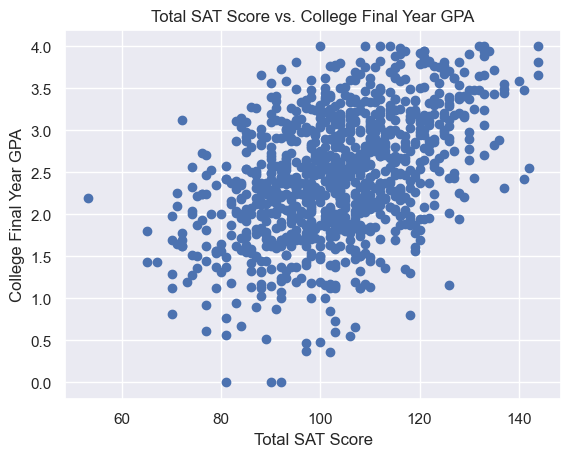

In [5]:
SAT = data["sat_sum"]
GPA = data["fyc_gpa"]


plt.scatter(SAT, GPA)
plt.title("Total SAT Score vs. College Final Year GPA")
plt.xlabel("Total SAT Score")
plt.ylabel("College Final Year GPA")
plt.show()

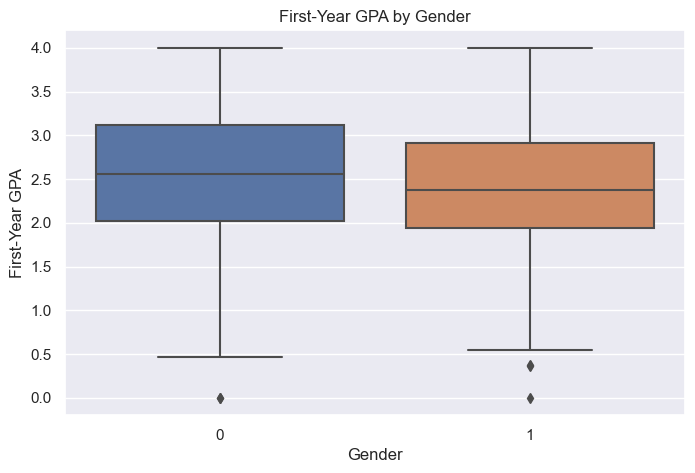

In [6]:
SEX = data["sex"]
GPA = data["fyc_gpa"]

# Box plot of first-year GPA by gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=SEX, y=GPA, data=data)
plt.title('First-Year GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('First-Year GPA')
plt.show()


## Correlation Analysis

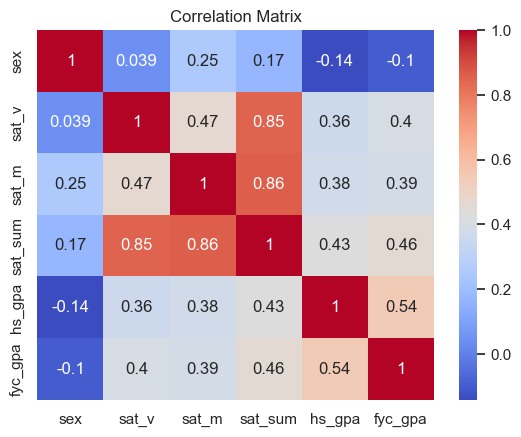

In [7]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3D Visualization of the predictors

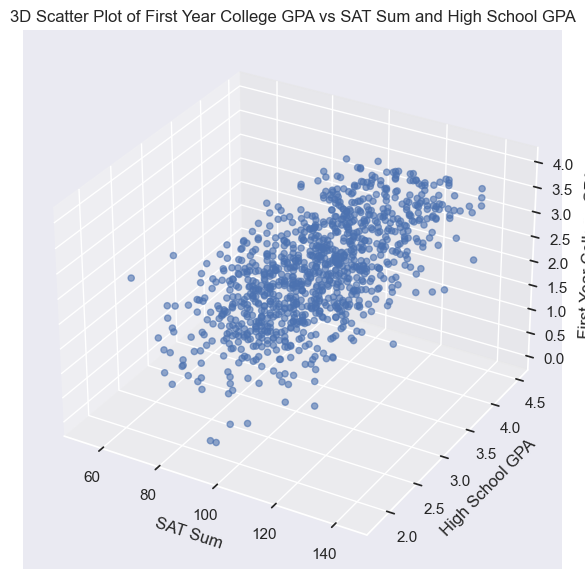

In [8]:
from mpl_toolkits.mplot3d import Axes3D # For a 2 predictors

z = data["fyc_gpa"]
x = data["sat_sum"]
y = data["hs_gpa"]


# Visualizing the relationship between x2, x1 and y
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='b', marker='o', alpha=0.6)

ax.set_xlabel("SAT Sum")
ax.set_ylabel("High School GPA")
ax.set_zlabel("First Year College GPA")
ax.set_title("3D Scatter Plot of First Year College GPA vs SAT Sum and High School GPA")
plt.show()

## Creating Linear Regression

In [9]:
# Declearing the dependent and independent variables
y = data["fyc_gpa"]
x = data[["sat_sum", "hs_gpa"]]

x = sm.add_constant(x)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                fyc_gpa   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     278.1
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           1.08e-96
Time:                        15:53:10   Log-Likelihood:                -896.79
No. Observations:                1000   AIC:                             1800.
Df Residuals:                     997   BIC:                             1814.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8734      0.149     -5.861      0.000      -1.166      -0.581
sat_sum        0.0144      0.001      9.878      0.000       0.012       0.017
hs_gpa         0.5795      0.038     15.069      0.000       0.504       0.655
==============================================================================
Omnibus:                       29.987   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.507
Skew:                          -0.401   Prob(JB):                     8.73e-08
Kurtosis:                       3.370   Cond. No.                         832.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predictive Modeling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = data[['sat_sum', 'hs_gpa']]
y = data['fyc_gpa']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}, R²: {r2}')


RMSE: 0.6295196229881215, R²: 0.33107486660975816




# Conclusion

In this analysis, we found that both SAT scores and high school GPA are significant predictors of first-year GPA. High school GPA showed a slightly stronger correlation, indicating that a student’s high school performance plays a crucial role in early college success. Additionally, female students had, on average, higher first-year GPAs than male students, suggesting that gender may have an influence on academic outcomes.

These findings highlight the importance of both SAT preparation and maintaining a strong high school GPA for prospective students. However, the analysis is limited to data from a specific college, and other factors not included in this dataset could also impact first-year GPA.